https://cs50.harvard.edu/python/2022/psets/6/shirt/

# CS50 P-Shirt

CS50 shirt

After finishing CS50 itself, students on campus at Harvard traditionally receive their very own I took CS50 t-shirt. No need to buy one online, but like to try one on virtually?

In a file called shirt.py, implement a program that expects exactly two command-line arguments:

    in sys.argv[1], the name (or path) of a JPEG or PNG to read (i.e., open) as input
    in sys.argv[2], the name (or path) of a JPEG or PNG to write (i.e., save) as output

The program should then overlay shirt.png (which has a transparent background) on the input after resizing and cropping the input to be the same size, saving the result as its output.

Open the input with Image.open, per pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open, resize and crop the input with ImageOps.fit, per pillow.readthedocs.io/en/stable/reference/ImageOps.html#PIL.ImageOps.fit, using default values for method, bleed, and centering, overlay the shirt with Image.paste, per pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.paste, and save the result with Image.save, per pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save.

The program should instead exit via sys.exit:

    if the user does not specify exactly two command-line arguments,
    if the input’s and output’s names do not end in .jpg, .jpeg, or .png, case-insensitively,
    if the input’s name does not have the same extension as the output’s name, or
    if the specified input does not exist.

Assume that the input will be a photo of someone posing in just the right way, like these demos, so that, when they’re resized and cropped, the shirt appears to fit perfectly.

If you’d like to run your program on a photo of yourself, first drag the photo over to VS Code’s file explorer, into the same folder as shirt.py. No need to submit any photos with your code. But, if you would like, you’re welcome (but not expected) to share a photo of yourself wearing your virtual shirt in any of CS50’s communities!

### Hints

    Note that you can determine a file’s extension with os.path.splitext, per docs.python.org/3/library/os.path.html#os.path.splitext.
    Note that open can raise a FileNotFoundError, per docs.python.org/3/library/exceptions.html#FileNotFoundError.
    Note that the Pillow package comes with quite a few classes and methods, per pypi.org/project/Pillow. You might find its handbook and reference helpful to skim. You can install the package with:

    pip install Pillow

    You can open an image (e.g., shirt.png) with code like:

    shirt = Image.open("shirt.png")

    You can get the width and height, respectively, of that image as a tuple with code like:

    size = shirt.size

    And you can overlay that image on top of another (e.g., photo) with code like

    photo.paste(shirt, shirt)

    wherein the first shirt represents the image to overlay and the second shirt represents a “mask” indicating which pixels in photo to update.
    Note that you can open an image (e.g., shirt.png) in VS Code by running

    code shirt.png

    or by double-clicking its icon in VS Code’s file explorer.


# Solution

- Essa deu trabalho pra entender a manipulação de imagen, mas deu bom
- Só funciona em um arquivo .py. Exemplo de comando no  terminal:
    - python shirt.py before1.jpg after1.jpg
- Imagens de input precisam estar na pasta

In [ ]:
import sys
from PIL import Image, ImageOps
import PIL

def main():

    # Checking If there are 3 arguments which are the program name, the csv input file and the csv output file, else exit program with the respective error messages
    input_file_name, output_file_name = check_arguments(sys.argv)

    # Reading both input images
    try:
        shirt = Image.open("shirt.png")
        input_image = Image.open(input_file_name)
    except FileNotFoundError:
        sys.exit("Input does not exist")

    # Extracting shirt size image
    size = shirt.size
    # Resize and Crop the input image
    resized_input = ImageOps.fit(input_image, size)
    # Pasting shirt on input
    resized_input.paste(shirt, shirt)
    # Saving with the provided output name
    resized_input.save(output_file_name)


def check_arguments(args):
    extension_list = ["jpg", "jpeg", "png"]

    ### Checking amount of arguments, if it's 2 continue, otherwise exit
    if len(args) < 3:
        sys.exit("Too few command-line arguments")
    elif len(args) > 3:
        sys.exit("Too many command-line arguments")


    # Store the file name in a variable
    input_file_name, output_file_name = args[1].strip(), args[2].strip()
    # Testing if both input and outputs' extensions are valid
    input_extension, output_extension = input_file_name.split('.')[-1].lower(), output_file_name.split('.')[-1].lower()
    if input_extension not in extension_list:
        sys.exit("Invalid input")
    elif output_extension not in extension_list:
        sys.exit("Invalid output")
    elif input_extension != output_extension:
        sys.exit("Input and output have different extensions")

    return input_file_name, output_file_name

#if the input’s and output’s names do not end in .jpg, .jpeg, or .png, case-insensitively,

if __name__ == "__main__":
    main()


# How to Test

Here’s how to test your code manually:

    Run your program with python shirt.py. Your program should exit using sys.exit and provide an error message:

    Too few command-line arguments   

    Be sure to download muppets.zip and extract a collection of muppet photos using unzip muppets.zip. Run your program with python shirt.py before1.jpg before2.jpg before3.jpg. Your program should output:

    Too many command-line arguments

    Run your program with python shirt.py before1.jpg invalid_format.bmp. Your program should exit using sys.exit and provide an error message:

    Invalid output

    Run your program with python shirt.py before1.jpg after1.png. Your program should exit using sys.exit and provide an error message:

    Input and output have different extensions

    Run your program with python shirt.py non_existent_image.jpg after1.jpg. Your program should exit using sys.exit and provide an error message:

    Input does not exist

    Run your program with python shirt.py before1.jpg after1.jpg. Assuming you’ve downloaded and unzipped muppets.zip, your program should create an image like the below:
    after

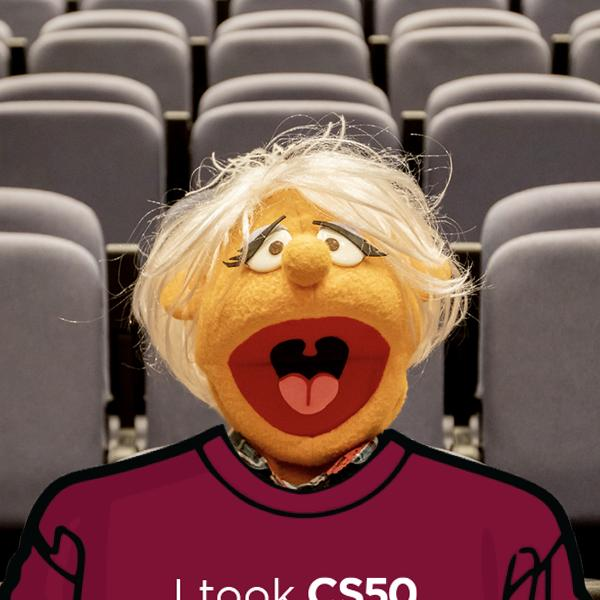